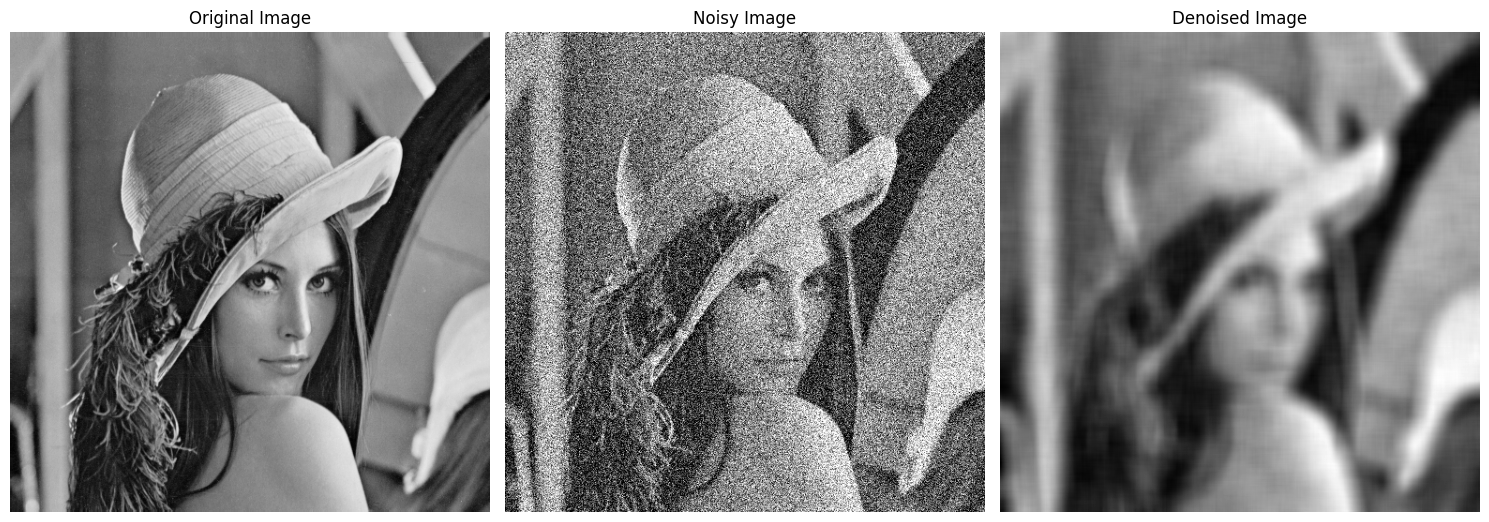

In [12]:
import numpy as np
from skimage.util import random_noise
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Load a sample image from a URL
image_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image = image.convert('L')  # Convert to grayscale
image = np.array(image)

# Add Gaussian noise to the image
noisy_image = random_noise(image, mode='gaussian', var=0.05)  # Increased noise variance
noisy_image = np.array(255 * noisy_image, dtype='uint8')

# Estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy_image, channel_axis=None))

# Apply Non-Local Means Denoising using skimage
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=11)  # 11x11 search area

# Adjust the h parameter for better results
h = 0.6 * sigma_est

denoised_image = denoise_nl_means(noisy_image, h=h, fast_mode=False, **patch_kw)

# Plot the images
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()